<a href="https://www.kaggle.com/code/kelixirr/tl-with-efficientnetv2b0-fine-tuning?scriptVersionId=142383310" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.12.0


Getting Helper Functions

In [6]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-09-08 22:04:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-08 22:04:10 (33.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-09-08 22:05:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   102MB/s    in 1.6s    

2023-09-08 22:05:42 (102 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [8]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [9]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [16]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMAGE_SIZE,
                                                                            label_mode = "categorical",
                                                                            )

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                           image_size = IMAGE_SIZE,
                                                                           label_mode = 'categorical',
                                                                           )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [18]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0

In [20]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = base_model(inputs)
print(x.shape)

x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(x.shape)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

# compile

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_10_percent = model_0.fit(train_data_10_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_10_percent),
                                validation_data = test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)))

(None, 7, 7, 1280)
(None, 1280)
Epoch 1/5
24/24 [==============================] - 78s 3s/step - loss: 1.9074 - accuracy: 0.4160 - val_loss: 1.3390 - val_accuracy: 0.7253
Epoch 2/5
24/24 [==============================] - 66s 3s/step - loss: 1.1625 - accuracy: 0.7333 - val_loss: 0.9183 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 44s 2s/step - loss: 0.8404 - accuracy: 0.8027 - val_loss: 0.7130 - val_accuracy: 0.8569
Epoch 4/5
24/24 [==============================] - 45s 2s/step - loss: 0.6900 - accuracy: 0.8453 - val_loss: 0.6283 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 45s 2s/step - loss: 0.6001 - accuracy: 0.8680 - val_loss: 0.5624 - val_accuracy: 0.8734


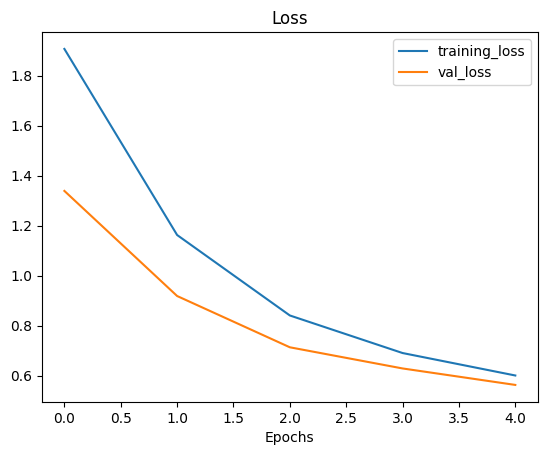

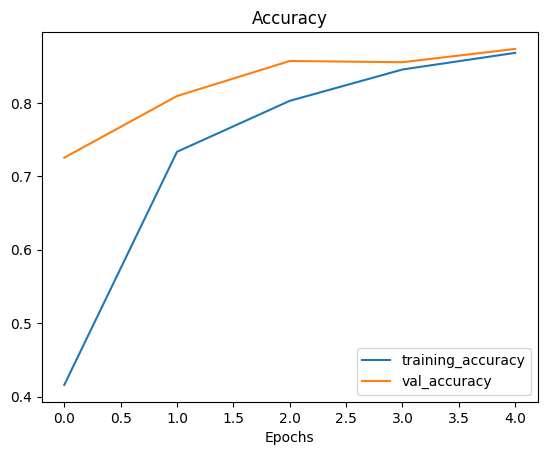

In [21]:
plot_loss_curves(history_10_percent)

In [22]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


In [23]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   0          ['rescaling_1[0][0]']            
 )                              3)                                                

In [24]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

## On 1% Data

In [25]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-09-08 22:36:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  68.9MB/s    in 1.9s    

2023-09-08 22:36:07 (68.9 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [26]:
IMAGE_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode = 'categorical',
                                                                          image_size = IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         label_mode = 'categorical',
                                                                         image_size = IMAGE_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
# data augmentation
from tensorflow import keras
from keras import layers

data_augmentation = keras.Sequential([
    
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = "data_augmentation")


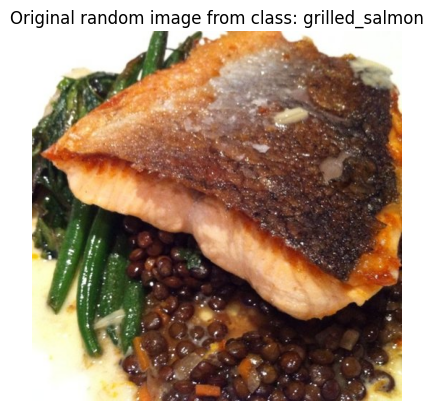

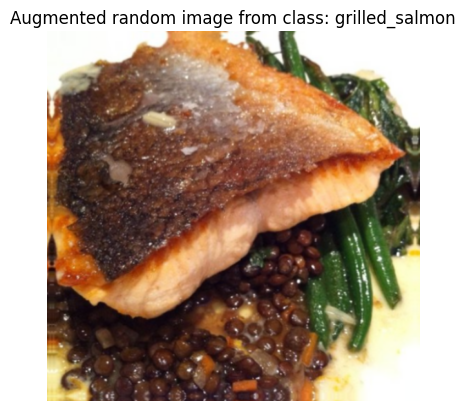

In [29]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

import os 
import random 

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class 

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image 

img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis =0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) 
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [36]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) 
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = 'input_layer')

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1_history = model_1.fit(train_data_1_percent,
                             epochs = 5,
                             steps_per_epoch = len(train_data_1_percent),
                             validation_data = test_data,
                             validation_steps = int(0.25* len(test_data)))

Epoch 1/5
3/3 [==============================] - 35s 12s/step - loss: 2.4208 - accuracy: 0.1000 - val_loss: 2.2863 - val_accuracy: 0.1809
Epoch 2/5
3/3 [==============================] - 23s 11s/step - loss: 2.2063 - accuracy: 0.2286 - val_loss: 2.1754 - val_accuracy: 0.2352
Epoch 3/5
3/3 [==============================] - 23s 11s/step - loss: 2.0348 - accuracy: 0.3714 - val_loss: 2.0889 - val_accuracy: 0.2599
Epoch 4/5
3/3 [==============================] - 23s 11s/step - loss: 1.9246 - accuracy: 0.4571 - val_loss: 1.9941 - val_accuracy: 0.3191
Epoch 5/5
3/3 [==============================] - 23s 11s/step - loss: 1.7533 - accuracy: 0.5571 - val_loss: 1.9120 - val_accuracy: 0.3668


In [37]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [38]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 77s 977ms/step - loss: 1.9275 - accuracy: 0.3608


[1.9275310039520264, 0.36079999804496765]

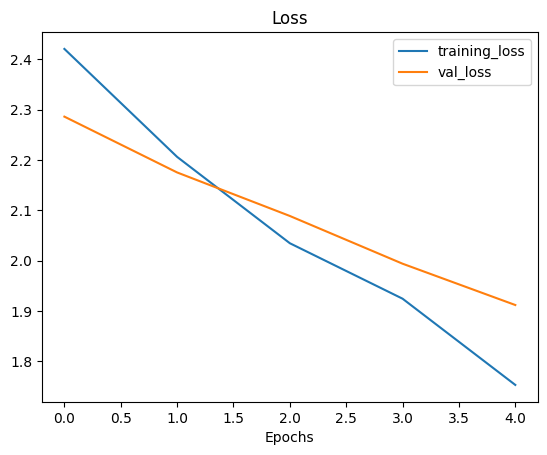

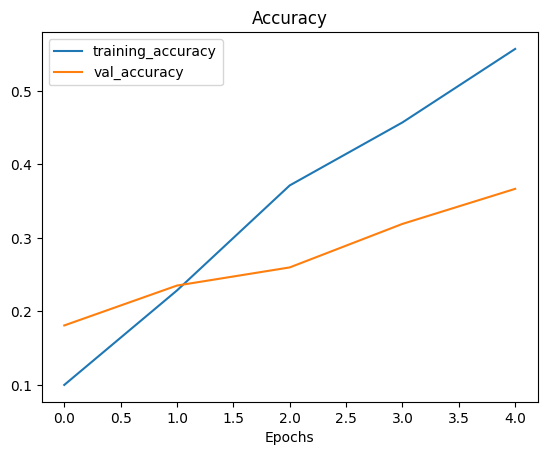

In [40]:
plot_loss_curves(model_1_history)

## Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [41]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [42]:
IMAGE_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = 'categorical',
                                                               image_size = IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [43]:
data_augmentation = keras.Sequential([
    
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    
], name = "data_augmentation")

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) 
base_model.trainable = False 

inputs = layers.Input(shape = input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(activation = "relu", name = 'output_layer')(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [46]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False):
    
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) 
    base_model.trainable = training

    inputs = layers.Input(shape = input_shape, name = 'input_layer')
    x = data_augmentation(inputs)
    x = base_model(x, training = False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(output_shape, activation = "softmax", name = 'output_layer')(x)

    model = keras.Model(inputs, outputs)

    model.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate),
                    metrics = ['accuracy'])
    return model

In [47]:
model_2 = create_base_model()

In [48]:
# creating checkpoint
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = True,
                                                         save_frequency = "epoch",
                                                         verbose = 1)

In [51]:
initial_epochs = 5 

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs = initial_epochs,
                                          validation_data = test_data,
                                          validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 62s 2s/step - loss: 1.9763 - accuracy: 0.3480 - val_loss: 1.4847 - val_accuracy: 0.6711
Epoch 2/5
24/24 [==============================] - 51s 2s/step - loss: 1.3756 - accuracy: 0.6600 - val_loss: 1.0642 - val_accuracy: 0.7599
Epoch 3/5
24/24 [==============================] - 48s 2s/step - loss: 1.0827 - accuracy: 0.7280 - val_loss: 0.8289 - val_accuracy: 0.8043
Epoch 4/5
24/24 [==============================] - 50s 2s/step - loss: 0.9381 - accuracy: 0.7680 - val_loss: 0.7092 - val_accuracy: 0.8076
Epoch 5/5
24/24 [==============================] - 47s 2s/step - loss: 0.8365 - accuracy: 0.7947 - val_loss: 0.6454 - val_accuracy: 0.8158


In [52]:
# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 79s 1s/step - loss: 0.6564 - accuracy: 0.8216


[0.656432569026947, 0.8216000199317932]

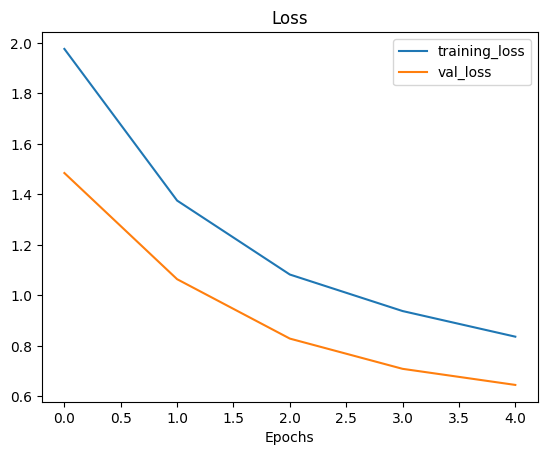

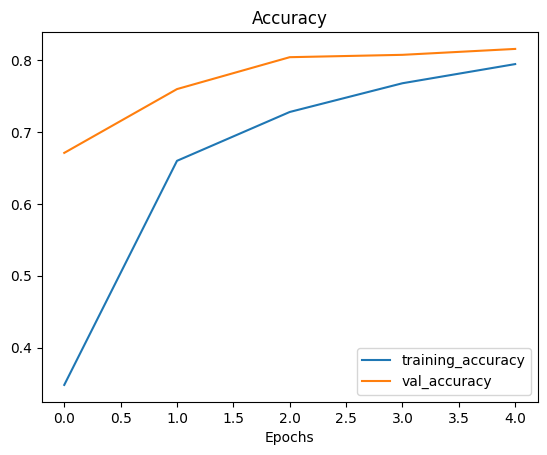

In [56]:
# Plot model loss curves
plot_loss_curves(history_10_percent_data_aug)

## Model 3: Fine-tuning an existing model on 10% of the data

In [58]:
for layer_number, layer in enumerate(model_2.layers):
    print(f"Layer number: {layer_number} | Layer name: {layer.name} Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer Trainable? True
Layer number: 1 | Layer name: data_augmentation Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 Trainable? False
Layer number: 3 | Layer name: global_average_pooling2d Trainable? True
Layer number: 4 | Layer name: output_layer Trainable? True


In [59]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [60]:
model_2_base_model.trainable = True

## Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
    layer.trainable = False
    
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

In [61]:
for layer_number, layer in enumerate(model_2_base_model.layers):
    print(layer_number, layer.name, layer.trainable)  

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [62]:
print(len(model_2.trainable_variables))

12


In [63]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data = test_data,
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
24/24 [==============================] - 65s 2s/step - loss: 0.7853 - accuracy: 0.7533 - val_loss: 0.5009 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - 52s 2s/step - loss: 0.5277 - accuracy: 0.8427 - val_loss: 0.5771 - val_accuracy: 0.8191
Epoch 7/10
24/24 [==============================] - 54s 2s/step - loss: 0.3800 - accuracy: 0.8787 - val_loss: 0.4577 - val_accuracy: 0.8421
Epoch 8/10
24/24 [==============================] - 52s 2s/step - loss: 0.3212 - accuracy: 0.9053 - val_loss: 0.4475 - val_accuracy: 0.8503
Epoch 9/10
24/24 [==============================] - 50s 2s/step - loss: 0.2501 - accuracy: 0.9253 - val_loss: 0.3899 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 53s 2s/step - loss: 0.1667 - accuracy: 0.9480 - val_loss: 0.4560 - val_accuracy: 0.8602


In [64]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 79s 999ms/step - loss: 0.5428 - accuracy: 0.8456


In [65]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3479999899864197, 0.6600000262260437, 0.7279999852180481, 0.7680000066757202, 0.7946666479110718, 0.753333330154419, 0.8426666855812073, 0.8786666393280029, 0.9053333401679993, 0.9253333210945129, 0.9480000138282776]


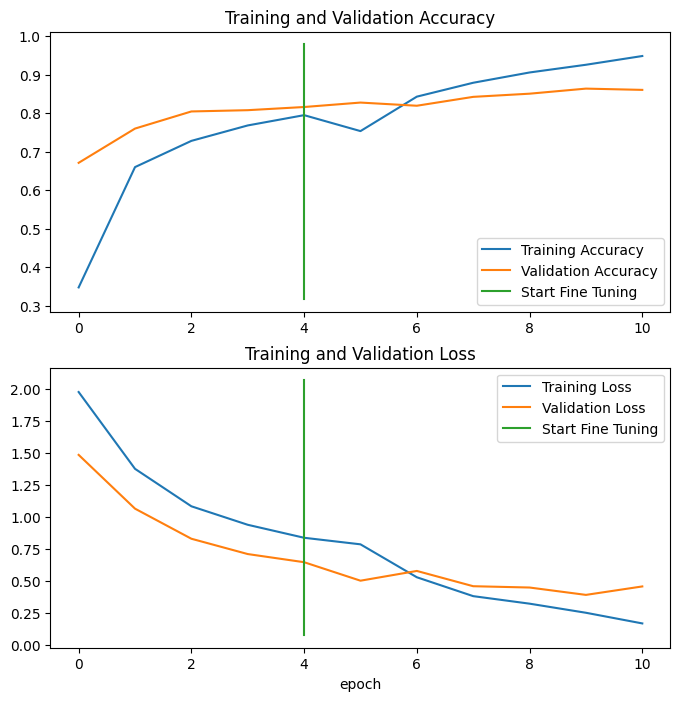

In [66]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

## Model 4: Fine-tuning an existing model all of the data

In [67]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-09-09 00:21:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 173.194.202.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   169MB/s    in 2.9s    

2023-09-09 00:21:51 (169 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [70]:
# converting into tensors

IMAGE_SIZE = (224, 224)

train_data_10_classes_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = "categorical",
                                                                                image_size = IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = 'categorical',
                                                               image_size = IMAGE_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [74]:
model_2 = create_base_model(learning_rate=0.0001)

In [75]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [76]:
print(len(model_2.trainable_variables))

2


In [77]:
model_2.evaluate(test_data)

79/79 [==============================] - 84s 979ms/step - loss: 2.4221 - accuracy: 0.1024


[2.4220926761627197, 0.10239999741315842]

In [80]:
# tunable layers
for layer_number, layer in enumerate(model_2.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling2d_2 True
4 output_layer True


In [82]:
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

for layer in model_2_base_model.layers[:-10]:
    layer.trainable = False

In [83]:
for layer_number, layer in enumerate(model_2_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_13 False
1 rescaling_12 False
2 normalization_12 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [84]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [87]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_all,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
235/235 [==============================] - 331s 1s/step - loss: 1.2159 - accuracy: 0.6143 - val_loss: 0.5060 - val_accuracy: 0.8306
Epoch 6/10
235/235 [==============================] - 323s 1s/step - loss: 0.6707 - accuracy: 0.7863 - val_loss: 0.4201 - val_accuracy: 0.8618
Epoch 7/10
235/235 [==============================] - 322s 1s/step - loss: 0.6036 - accuracy: 0.7997 - val_loss: 0.3810 - val_accuracy: 0.8717
Epoch 8/10
235/235 [==============================] - 321s 1s/step - loss: 0.5561 - accuracy: 0.8212 - val_loss: 0.3456 - val_accuracy: 0.8816
Epoch 9/10
235/235 [==============================] - 326s 1s/step - loss: 0.5341 - accuracy: 0.8251 - val_loss: 0.3254 - val_accuracy: 0.8947
Epoch 10/10
235/235 [==============================] - 315s 1s/step - loss: 0.4989 - accuracy: 0.8371 - val_loss: 0.3268 - val_accuracy: 0.8947


5
11
[0.3479999899864197, 0.6600000262260437, 0.7279999852180481, 0.7680000066757202, 0.7946666479110718, 0.6142666935920715, 0.7862666845321655, 0.7997333407402039, 0.8212000131607056, 0.8250666856765747, 0.837066650390625]


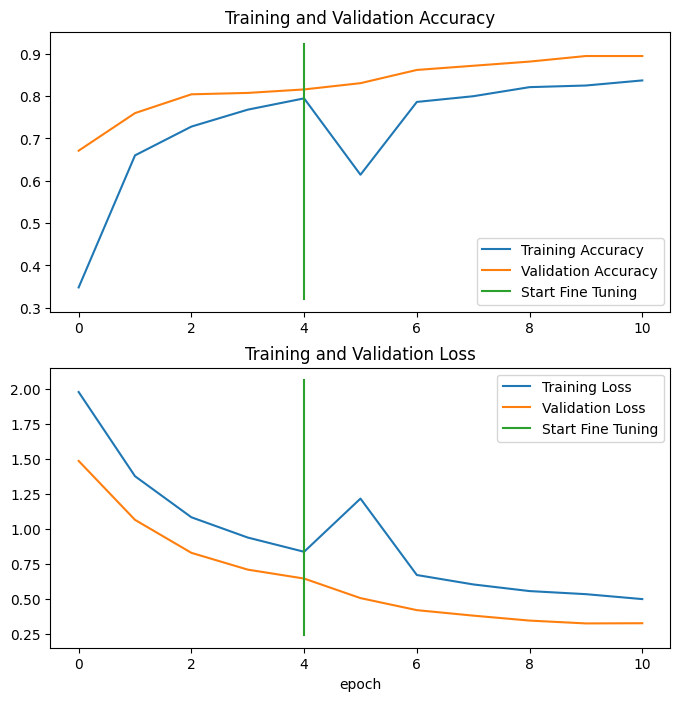

In [88]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)